In [76]:
import pandas as pd
import matplotlib.pyplot as plt

In [81]:
df = pd.read_csv('titanicdf.csv')

In [82]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [83]:
# Смотрим долю пустых значений в разрезе столбцов
for col in df.columns:
  print(col, round(df[col].isna().sum() / df.shape[0] *100,2))

PassengerId 0.0
Survived 0.0
Pclass 0.0
Name 0.0
Sex 0.0
Age 19.87
SibSp 0.0
Parch 0.0
Ticket 0.0
Fare 0.0
Cabin 77.1
Embarked 0.22


In [39]:
df.Parch.value_counts()

0    519
1    110
2     68
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [20]:
# Дубликатов нет
df.duplicated().sum()

0

In [84]:
# Убираем не значимые столбцы с большим количеством пустых значений
df = df.drop('Cabin',axis=1)

In [85]:
# Убираем строки где присутствуют пустые значения
df.dropna(inplace=True)

In [86]:
df.loc[df.Sex=='male','Sex'] = 1
df.loc[df.Sex=='female','Sex'] = 0
df.loc[df.Embarked=='S','Embarked'] = 0
df.loc[df.Embarked=='C','Embarked'] = 1
df.loc[df.Embarked=='Q','Embarked'] = 2

In [37]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0
...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",0,39.0,0,5,382652,29.1250,2
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,0
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,0
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,1


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 55.6+ KB


In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit
from sklearn.metrics import f1_score

In [88]:
model = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')

In [89]:
X_train,X_test,y_train, y_test = train_test_split(df.drop(['Survived','Ticket','Name','PassengerId'],axis=1), 
                                                  df['Survived'], 
                                                  test_size=0.3, 
                                                  random_state=55)

In [90]:
model.fit(X_train,y_train)

RandomForestClassifier(max_features='sqrt')

In [91]:
pred = model.predict(X_test)

In [92]:
pred

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1], dtype=int64)

In [93]:
probs = model.predict_proba(X_test)[:, 1]

In [94]:
probs

array([0.44      , 0.91      , 0.01      , 1.        , 0.02      ,
       0.34066667, 0.24183333, 0.        , 0.69      , 0.11      ,
       0.91      , 0.07      , 0.23      , 0.27      , 0.2425    ,
       0.64      , 0.        , 1.        , 1.        , 0.92      ,
       0.25      , 0.00666667, 0.314     , 0.74      , 0.1       ,
       0.28966667, 0.136     , 0.1035    , 0.72      , 0.72      ,
       0.05      , 0.87      , 0.08666667, 0.24      , 0.09      ,
       0.42      , 1.        , 0.63      , 1.        , 0.25666667,
       1.        , 0.29      , 0.04      , 0.83      , 0.67      ,
       0.22      , 0.17      , 0.2875    , 0.02      , 0.05      ,
       0.6       , 0.52      , 0.01      , 0.99      , 0.67      ,
       0.03      , 0.        , 0.24      , 0.21      , 0.06      ,
       0.27      , 0.81666667, 0.03      , 1.        , 0.81      ,
       0.2065    , 0.18      , 0.31      , 0.94      , 0.01      ,
       0.3775    , 0.24      , 0.3       , 0.        , 0.93   

In [95]:
print('Качество модели по метрике F1', f1_score(y_test,pred,average='binary'))

Качество модели по метрике F1 0.7738095238095238


In [96]:
print('Accuracy:',accuracy_score(y_test,pred))
print('Precision:',precision_score(y_test,pred))
print('Recall:',recall_score(y_test,pred))
print('F1:',f1_score(y_test,pred))

Accuracy: 0.822429906542056
Precision: 0.7647058823529411
Recall: 0.7831325301204819
F1: 0.7738095238095238


Это для новой модели у которой выверены параметры. Есть рост по всем метрикам кроме Recall:
Accuracy: 0.8364485981308412
Precision: 0.8
Recall: 0.7710843373493976
F1: 0.7852760736196319

In [97]:
fi = pd.DataFrame({'Параметры': list(X_train.columns),
                   'Важность': model.feature_importances_}).\
                    sort_values('Важность', ascending = False)
fi

,Параметры,Важность
2,Age,0.316401
1,Sex,0.238993
5,Fare,0.238038
0,Pclass,0.084700
3,SibSp,0.051231
4,Parch,0.042472
6,Embarked,0.028165


In [98]:
frame = {'Важность параметров':model.feature_importances_,'Параметры':X_train.columns}
result = pd.DataFrame(frame)
result.sort_values(by='Важность параметров', ascending=False)

,Важность параметров,Параметры
2,0.316401,Age
1,0.238993,Sex
5,0.238038,Fare
0,0.084700,Pclass
3,0.051231,SibSp
4,0.042472,Parch
6,0.028165,Embarked


In [58]:
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve,auc, fbeta_score

In [62]:
# Подбор параметров
# n_estimators, criterion, max_depth
params = []
for n_estimators in range (1,101):
    for max_depth in range (1,10):
        for criter in ['gini','entropy']:
            # print("--------", deep, "--------", leaf)
            rfc = RandomForestClassifier(n_estimators = n_estimators, max_depth = max_depth, criterion = criter, bootstrap = True, max_features = 'sqrt')
            model = rfc.fit(X_train, y_train)
            pred = model.predict(X_test)
            params.append([n_estimators,max_depth,criter,f1_score(y_test,pred),recall_score(y_test,pred)])

In [63]:
test_params = pd.DataFrame(params)
test_params.columns = ['n_estimators','max_depth','criterion','f1_score','recall_score']

In [99]:
test_params.sort_values(by='f1_score',ascending=False).head(10)

,n_estimators,max_depth,criterion,f1_score,recall_score
1377,77,5,entropy,0.822785,0.783133
910,51,6,gini,0.819876,0.795181
804,45,7,gini,0.819876,0.795181
463,26,7,entropy,0.819277,0.819277
262,15,6,gini,0.817610,0.783133
1359,76,5,entropy,0.817610,0.783133
963,54,5,entropy,0.815287,0.771084
304,17,9,gini,0.815287,0.771084
1091,61,6,entropy,0.814815,0.795181
1762,98,9,gini,0.814815,0.795181


In [100]:
# Лучшие параметры: n_estimators = 77, max_depth = 5, criterion = entropy
model_new = RandomForestClassifier(n_estimators = 77, max_depth = 5, criterion = 'entropy', bootstrap = True, max_features = 'sqrt')
model_new.fit(X_train, y_train)
new_pred = model_new.predict(X_test)

In [101]:
# Кроссвалидация
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=55)
scores = cross_val_score(model_new, X_train, y_train, cv=cv, scoring='recall')

In [102]:
scores.mean()

0.6822493125051587

In [103]:
scores

array([0.71929825, 0.73333333, 0.64516129, 0.69354839, 0.65625   ,
       0.6031746 , 0.69642857, 0.59016393, 0.68852459, 0.79661017])

In [104]:
# Оценка метрик усовершенствованной модели
print('Accuracy:',accuracy_score(y_test,new_pred))
print('Precision:',precision_score(y_test,new_pred))
print('Recall:',recall_score(y_test,new_pred))
print('F1:',f1_score(y_test,new_pred))

Accuracy: 0.8364485981308412
Precision: 0.8
Recall: 0.7710843373493976
F1: 0.7852760736196319


In [105]:
# ROC кривая
pred_proba = model.predict_proba(X_test)[:,1]

fpr, tpr, treshold = roc_curve(y_test, probs)
tree_auc = roc_auc_score(y_test, probs)
print('DecisionTreeClassifier: ROC AUC=%.3f' % (tree_auc))

DecisionTreeClassifier: ROC AUC=0.873


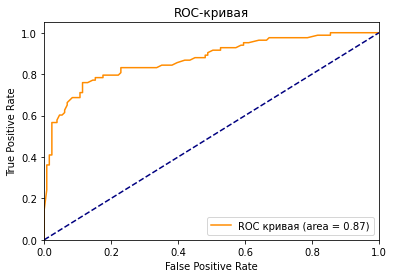

In [106]:
roc_auc = auc(fpr, tpr)
# строим график
plt.plot(fpr, tpr,  color='darkorange',
         label='ROC кривая (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc="lower right")
plt.show()